Take grayscale image of size 512x512, add some Gaussian noise and perform the following operations in frequency domain – 
Apply 4th order Butterworth and Gaussian low pass filter to analyze their performance quantitatively
Observe the ringing effect of ideal low pass filter on the image. Use different radius (D0) of ideal low pass filter and display their results
Perform edge detection of given the noise and clean image using ideal and Gaussian high pass filters


In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [22]:
def butterworth_filter(image,order,cutoff):
    height,width = image.shape
    butterworth = np.zeros((height,width), dtype= np.float32)
    for u in range(height):
        for v in range(width):
            d = np.sqrt((u-height/2)**2 + (v-width/2)**2)
            butterworth[u,v] = 1/(1+(d/cutoff)**(2*order))
    filter_image = image*butterworth
    filter_image = np.fft.ifft2(np.fft.ifftshift(filter_image))
    return np.abs(filter_image)


In [23]:
def gaussian_filter(image,cutoff):
    
    height,width = image.shape
    gaussian = np.zeros((height,width), dtype= np.float32)
    for u in range(height):
        for v in range(width):
            d = np.sqrt((u-height/2)**2 + (v-width/2)**2)
            gaussian[u,v]=np.exp(-(d**2/(2*(cutoff**2))))
    filter_fft = image * gaussian
    ifft_shift= np.fft.ifftshift(filter_fft)
    filter_image = np.fft.ifft2(ifft_shift)
    return np.abs(filter_image)
    

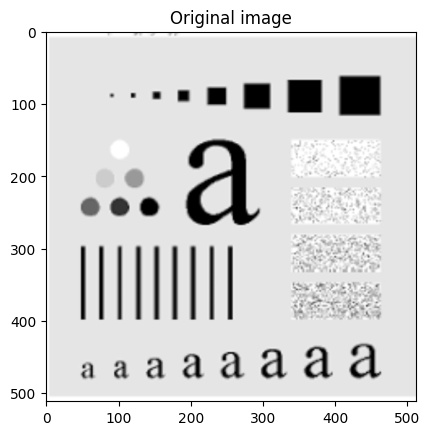

In [24]:
image = cv2.imread("8th.png",cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image,(512,512))
plt.imshow(image, cmap='gray')
plt.title("Original image")
plt.show()

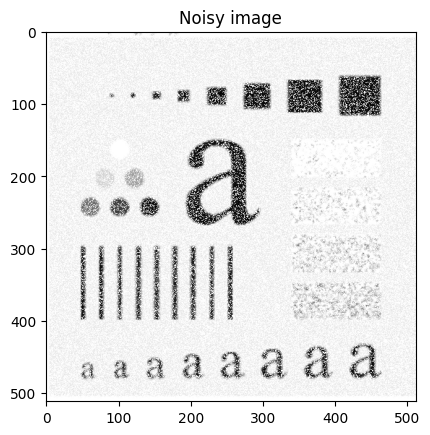

In [25]:
gauissian_noise = np.random.normal(7,13,image.shape).astype(np.uint8)
noisy_image = cv2.add(image,gauissian_noise)
plt.imshow(cv2.cvtColor(noisy_image,cv2.COLOR_BGR2RGB))
plt.title("Noisy image")
plt.show()

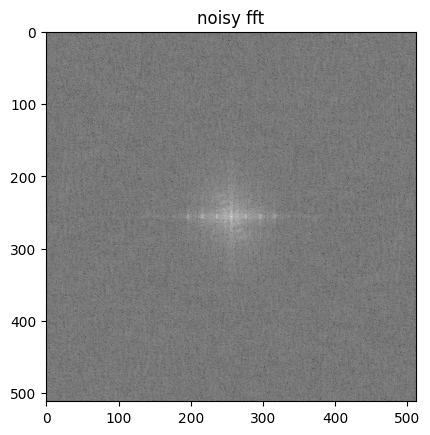

In [26]:
noisy_image_fft = np.fft.fftshift(np.fft.fft2(noisy_image))
plt.imshow(np.log(np.abs(noisy_image_fft)), cmap='gray')
plt.title("noisy fft")
plt.show()

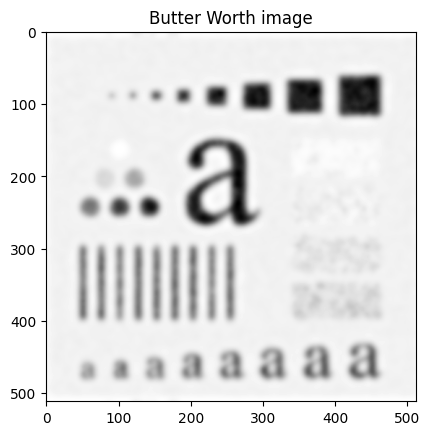

In [27]:
order,cutoff = 2, 25
butterworth_filter_image = butterworth_filter(noisy_image_fft,order,cutoff)
plt.imshow(butterworth_filter_image, cmap='gray')
plt.title("Butter Worth image")
plt.show()

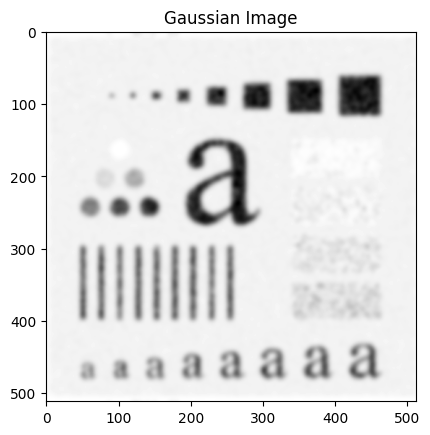

In [28]:
cutoff = 25
gauissian_noise_filter_inage = gaussian_filter(noisy_image_fft,cutoff)
plt.imshow(gauissian_noise_filter_inage,cmap="gray")
plt.title("Gaussian Image")
plt.show()

In [29]:
def ideal_low_pass_filter(image,cutoff):
    height,width = image.shape
    ideal_filter = np.zeros((height,width))
    for u in range(height):
        for v in range(width):
            d = np.sqrt((u-height/2)**2 + (v-width/2)**2)
            if d<=cutoff:
                ideal_filter[u,v]=1
    filter_image = image *ideal_filter
    filter_image = np.fft.ifftshift(filter_image)
    filter_image = np.fft.ifft2(filter_image)
    return np.abs(filter_image)

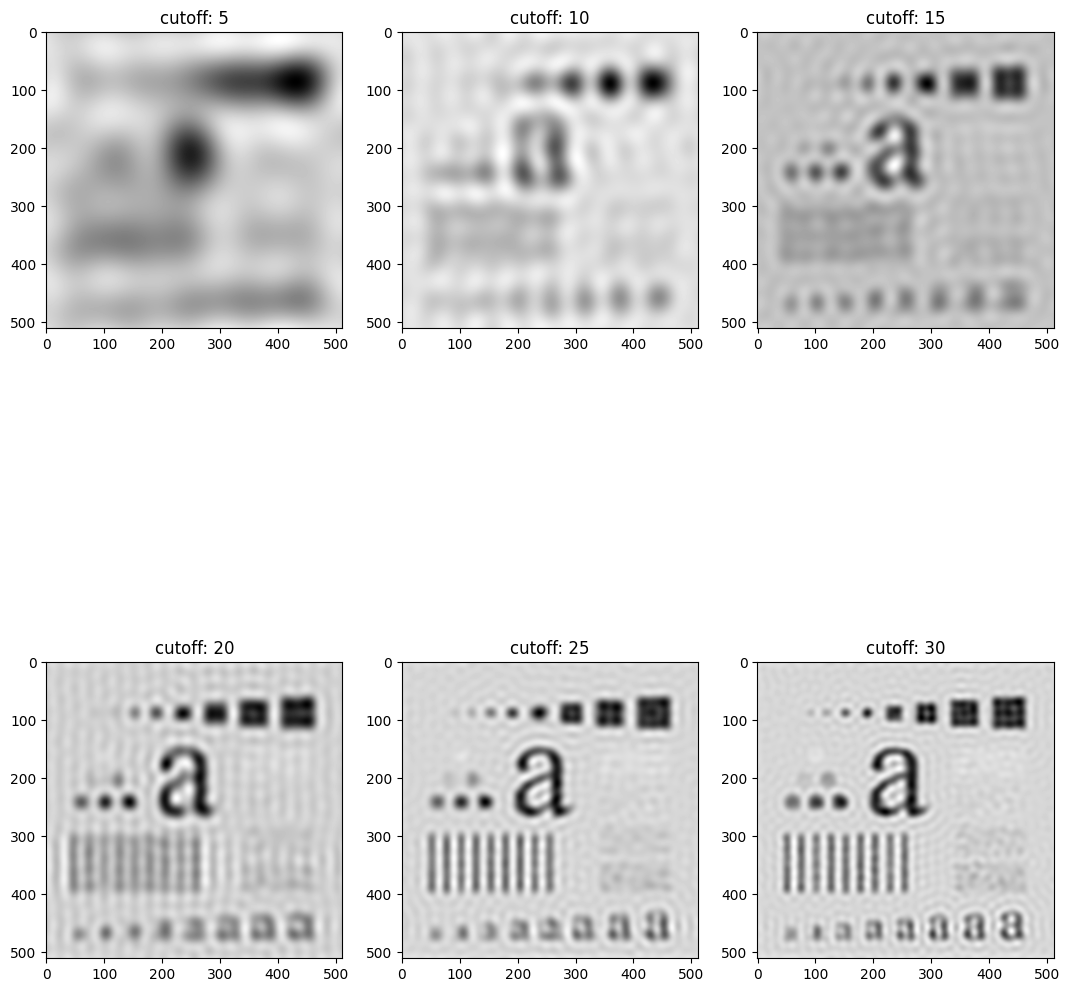

In [31]:
plt.figure(figsize=(13,15))

for r in range(1,7):
    ideal_image = ideal_low_pass_filter(noisy_image_fft,r*5)
    plt.subplot(2,3,r)
    plt.imshow(ideal_image,cmap='gray')
    plt.title(f"cutoff: {r*5}")
    plt.show